# Accelerated pixel and object classification (apoc)
[Apoc](https://github.com/haesleinhuepf/apoc) is a Python library for using machine learning in the image processing context; focused but not limited to fluorescent microscopy imaging data. This notebook demonstrates apoc's capabilities. There is also an interative user-interface offering pretty much the same functionality without the need for coding: [napari-accelerated-pixel-and-object-classification](https://github.com/haesleinhuepf/napari-accelerated-pixel-and-object-classification).

In [1]:
import apoc

from skimage.io import imread
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt
import numpy as np

## Pixel classification / semantic segmentation
Apoc offers a `PixelClassifier` that takes an intensity image and a sparse annotation to produce a semantic segmentation label image.

In [2]:
intensity_image = imread("blobs.tif")
sparse_annotation = imread("annotations_3class.tif")

In [3]:
features = "original gaussian_blur=1 laplace_box_of_gaussian_blur=1"

pixel_classifier = apoc.PixelClassifier()

pixel_classifier.train(features=features, 
                       ground_truth=sparse_annotation, 
                       image=intensity_image)

semantic_segmentation = pixel_classifier.predict(image=intensity_image)

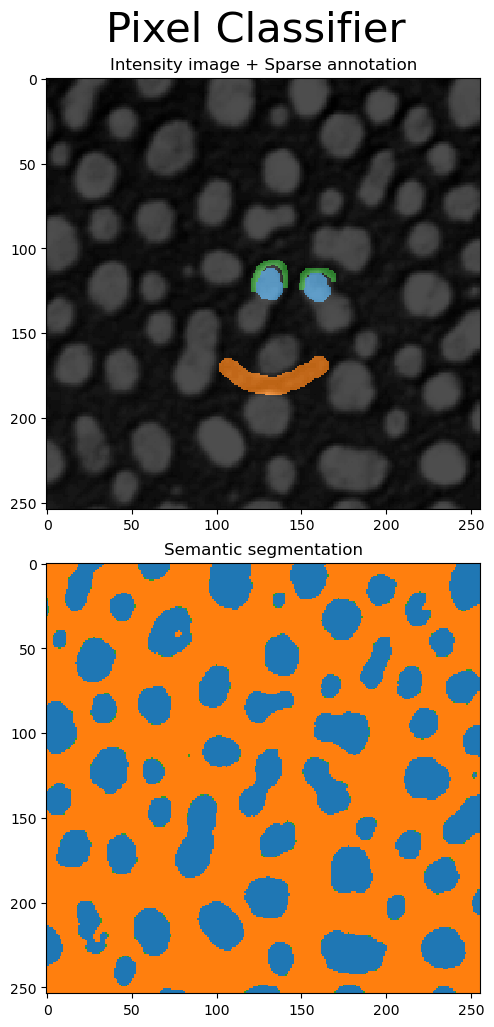

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(5,10.16), constrained_layout=True)

cle.imshow(intensity_image, plot=axes[0], continue_drawing=True)
cle.imshow(sparse_annotation, plot=axes[0], labels=True, alpha=0.7)
axes[0].set_title("Intensity image + Sparse annotation")
cle.imshow(semantic_segmentation, plot=axes[1], labels=True)
axes[1].set_title("Semantic segmentation")

fig.suptitle('Pixel Classifier', fontsize=30)
plt.savefig("../docs/demo_pixel_classifier.png", pad_inches=0)

## Instance segmentation
Using the same annotation apoc can also generate an instance segmentation label image. The `ObjectSegmenter` uses the same input images as the `PixelClassifier` and needs to know a class `positive_class_identifier` where connected components should be labeled.

In [5]:
features = "original gaussian_blur=1 laplace_box_of_gaussian_blur=1"

object_segmenter = apoc.ObjectSegmenter(positive_class_identifier=2)

object_segmenter.train(features=features, 
                       ground_truth=sparse_annotation, 
                       image=intensity_image)

instance_segmentation = object_segmenter.predict(image=intensity_image)

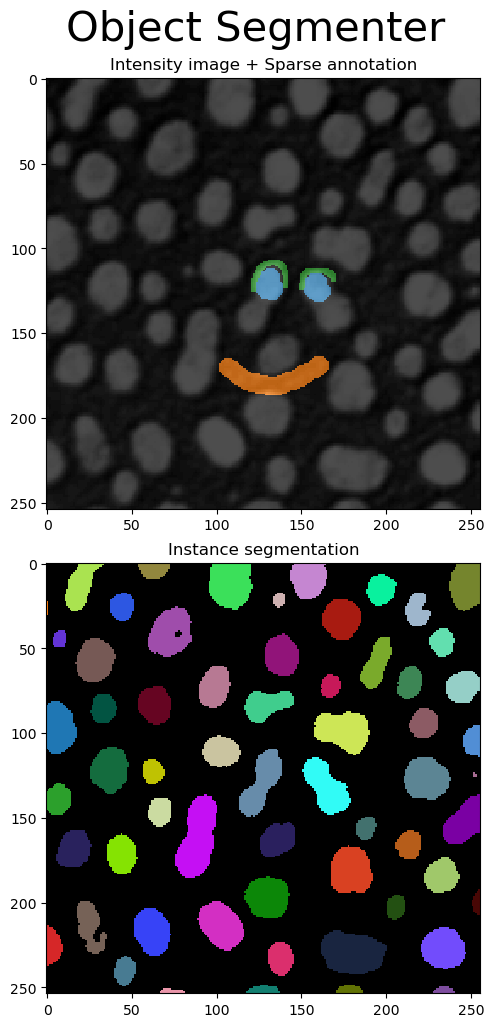

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(5,10.16), constrained_layout=True)

cle.imshow(intensity_image, plot=axes[0], continue_drawing=True)
cle.imshow(sparse_annotation, plot=axes[0], labels=True, alpha=0.7)
axes[0].set_title("Intensity image + Sparse annotation")
cle.imshow(instance_segmentation, plot=axes[1], labels=True)
axes[1].set_title("Instance segmentation")

fig.suptitle('Object Segmenter', fontsize=30)
plt.savefig("../docs/demo_object_segmenter.png", pad_inches=0)

## Probability maps
The `ProbabilityMapper` works similarly. Its output is a probability map for a specified class `output_probability_of_class`.

In [7]:
features = "original gaussian_blur=1 laplace_box_of_gaussian_blur=1"

probability_mapper = apoc.ProbabilityMapper(output_probability_of_class=3)

probability_mapper.train(features=features, 
                       ground_truth=sparse_annotation, 
                       image=intensity_image)

probability_map = probability_mapper.predict(image=intensity_image)

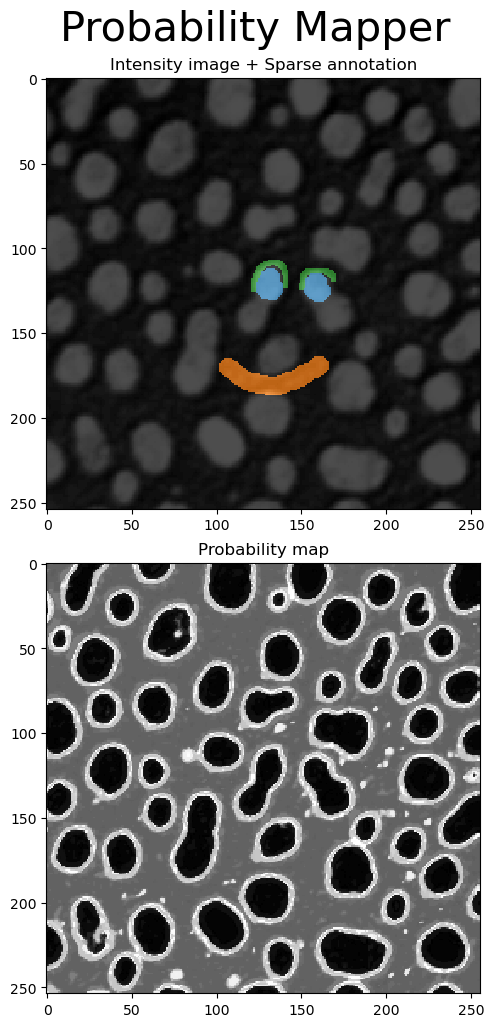

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(5,10.16), constrained_layout=True)

cle.imshow(intensity_image, plot=axes[0], continue_drawing=True)
cle.imshow(sparse_annotation, plot=axes[0], labels=True, alpha=0.7)
axes[0].set_title("Intensity image + Sparse annotation")
cle.imshow(probability_map, plot=axes[1])
axes[1].set_title("Probability map")

fig.suptitle('Probability Mapper', fontsize=30)
plt.savefig("../docs/demo_probability_mapper.png", pad_inches=0)

## Object classification
The `ObjectClassifier` allows separating labeled objects into separate categories. It needs an intensity image, a label image labeling objects and a sparse annotation of object classes as input. It produces a semantic segmentation of object classes.

In [9]:
label_annotation = imread("label_annotation.tif")

In [10]:
features = 'area,mean_max_distance_to_centroid_ratio,standard_deviation_intensity'

object_classifier = apoc.ObjectClassifier()

object_classifier.train(features=features, 
                 labels=instance_segmentation, 
                 sparse_annotation=label_annotation, 
                 image=intensity_image)

object_classes = object_classifier.predict(
                   labels=instance_segmentation, 
                   image=intensity_image)

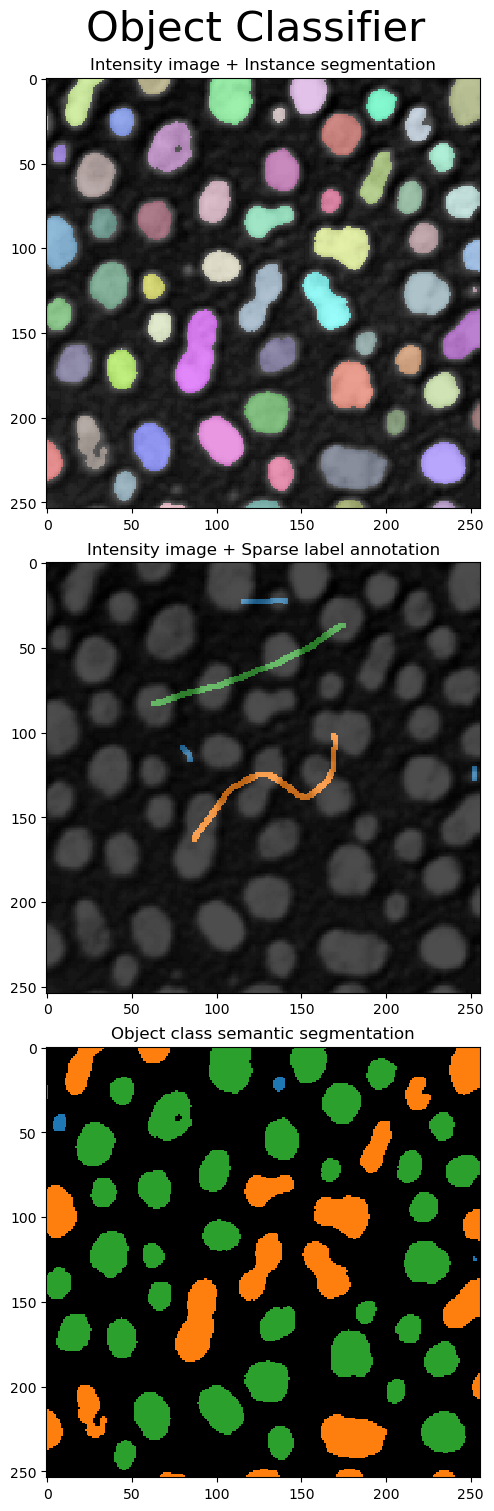

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(5,15), constrained_layout=True)

cle.imshow(intensity_image, plot=axes[0], continue_drawing=True)
cle.imshow(instance_segmentation, plot=axes[0], labels=True, alpha=0.5)
axes[0].set_title("Intensity image + Instance segmentation")
cle.imshow(intensity_image, plot=axes[1], continue_drawing=True)
cle.imshow(label_annotation, plot=axes[1], labels=True, alpha=0.7)
axes[1].set_title("Intensity image + Sparse label annotation")
cle.imshow(object_classes, plot=axes[2], labels=True)
axes[2].set_title("Object class semantic segmentation")

fig.suptitle('Object Classifier', fontsize=30)
plt.savefig("../docs/demo_object_classifier.png", pad_inches=0)

## Object selection
In case one only wants to keep objects of a certain kind and drop the others, the `ObjectSelector` can help. It works like the `ObjectClassifier` and has one additional parameter, the class `positive_class_identifier` to keep. It results in an instance segmentation.

In [12]:
features = 'area,mean_max_distance_to_centroid_ratio,standard_deviation_intensity'

object_selector = apoc.ObjectSelector(positive_class_identifier=1)

object_selector.train(features=features, 
                 labels=instance_segmentation, 
                 sparse_annotation=label_annotation, 
                 image=intensity_image)

selected_objects = object_selector.predict(
                   labels=instance_segmentation, 
                   image=intensity_image)

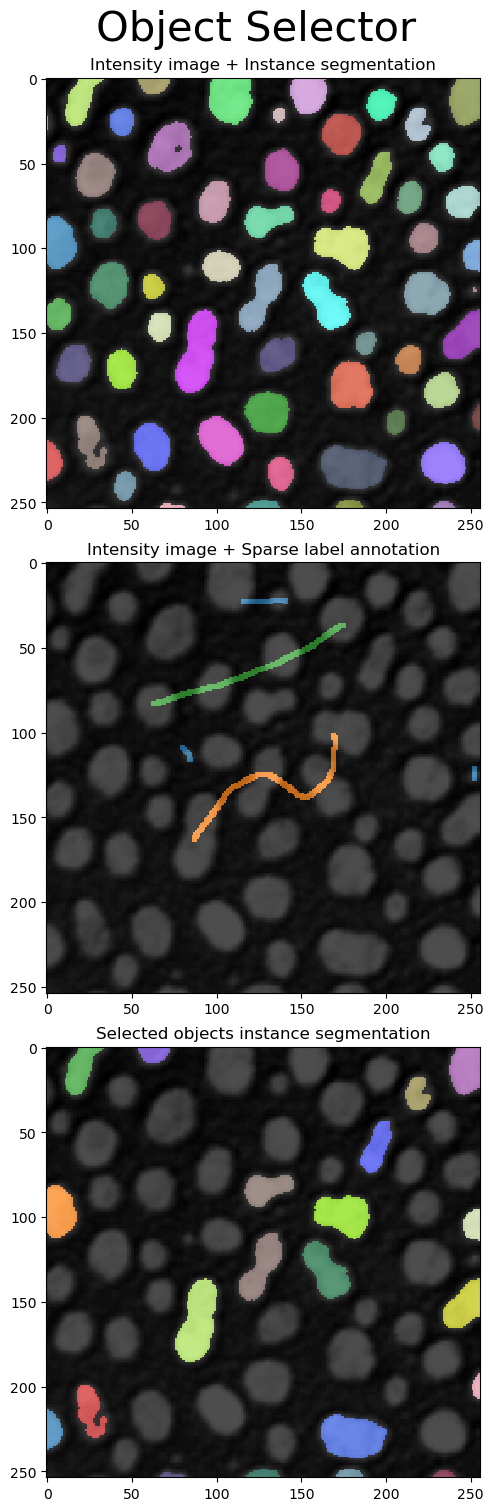

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(5,15), constrained_layout=True)

cle.imshow(intensity_image, plot=axes[0], continue_drawing=True)
cle.imshow(instance_segmentation, plot=axes[0], labels=True, alpha=0.7)
axes[0].set_title("Intensity image + Instance segmentation")
cle.imshow(intensity_image, plot=axes[1], continue_drawing=True)
cle.imshow(label_annotation, plot=axes[1], labels=True, alpha=0.7)
axes[1].set_title("Intensity image + Sparse label annotation")
cle.imshow(intensity_image, plot=axes[2], continue_drawing=True)
cle.imshow(selected_objects, plot=axes[2], labels=True, alpha=0.7)
axes[2].set_title("Selected objects instance segmentation")

fig.suptitle('Object Selector', fontsize=30)
plt.savefig("../docs/demo_object_selector.png", pad_inches=0)

## Object merging
Objects can also be merged using the `ObjectMerger` which consumes an intensity image, an instance segmentation label image and an edge annotation image. Objects with edges annotated with label `1` are ment to be merged. Edges annotated with label `2` are meant to stay. It is recommended to use intensity equivalized images with membrane staining for this and oversegmented instance segementations of cells.

In [14]:
membrane_image = imread("membrane2d.tif")
intensity_equivalized_image = cle.divide_by_gaussian_background(membrane_image, sigma_x=10, sigma_y=10)
oversegmented_segmentation = imread("membrane2d_oversegmented.tif")
edge_annotation = imread("membrane2d_merge_annotation.tif")

In [15]:
features = "touch_portion mean_touch_intensity"

object_merger = apoc.ObjectMerger()

object_merger.train(features=features,
                 labels=oversegmented_segmentation,
                 sparse_annotation=edge_annotation,
                 image=intensity_equivalized_image)

merged_objects = object_merger.predict(labels=oversegmented_segmentation,
                      image=intensity_equivalized_image)

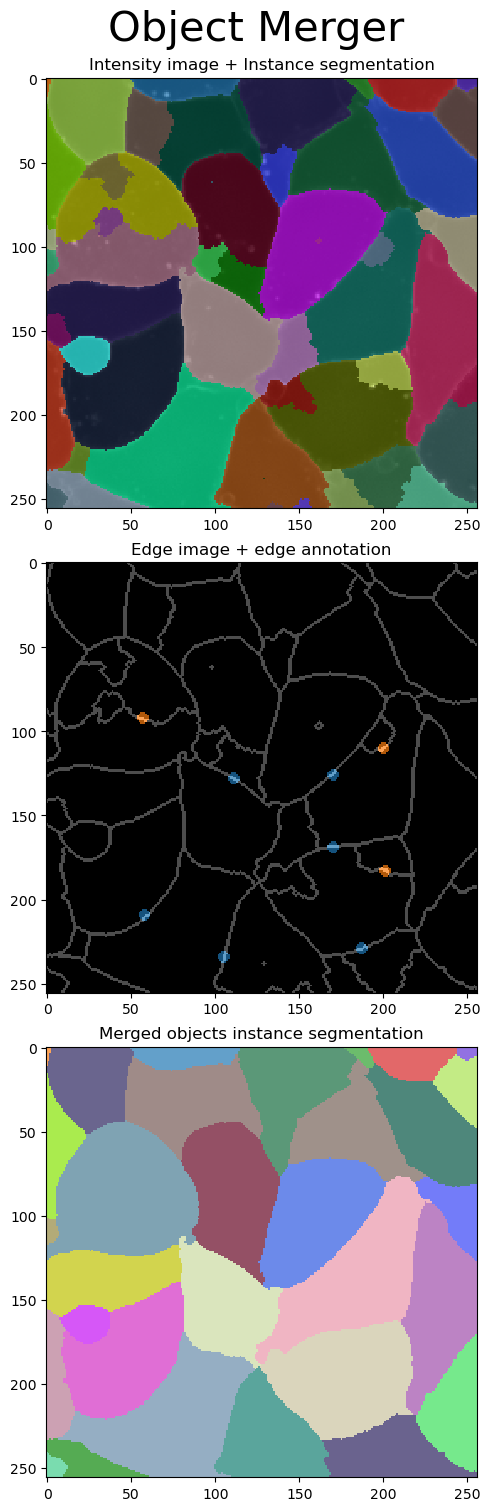

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(5,15), constrained_layout=True)

cle.imshow(intensity_equivalized_image, plot=axes[0], continue_drawing=True)
cle.imshow(oversegmented_segmentation, plot=axes[0], labels=True, alpha=0.7)
axes[0].set_title("Intensity image + Instance segmentation")
cle.imshow(cle.detect_label_edges(oversegmented_segmentation), plot=axes[1], continue_drawing=True)
cle.imshow(edge_annotation, plot=axes[1], labels=True, alpha=0.7)
axes[1].set_title("Edge image + edge annotation")
cle.imshow(merged_objects, plot=axes[2], labels=True, alpha=0.7)
axes[2].set_title("Merged objects instance segmentation")

fig.suptitle('Object Merger', fontsize=30)
plt.savefig("../docs/demo_object_merger.png", pad_inches=0)

## Overview
This section just serves making a figure as graphical abstract for apoc.

In [17]:
image_files = [
    "../docs/demo_pixel_classifier.png",
    "../docs/demo_object_segmenter.png",
    "../docs/demo_probability_mapper.png",
    "../docs/demo_object_classifier.png",
    "../docs/demo_object_selector.png",
    "../docs/demo_object_merger.png",
]
# load all images
images = [imread(f) for f in image_files]

# determine largest image size
max_shape = np.asarray([images[0].shape])
for image in images:
    shape = np.asarray([image.shape])
    max_shape = cle.maximum_images(max_shape, shape)

max_shape = np.asarray(max_shape)[0]
max_shape

array([1500.,  500.,    4.], dtype=float32)

In [18]:
# pad all images
def pad(size1, size2):
    return 0, int(abs(size1 - size2))
pad_sizes = [pad(image.shape[0], max_shape[0]) for image in images]

(pad_sizes[0], (0,0), (0,0))

((0, 484), (0, 0), (0, 0))

In [19]:
padded_images = [np.pad(image, (pad_size, (0,0), (0,0))) for image, pad_size in zip(images, pad_sizes)]

for image in padded_images:
    shape = np.asarray([image.shape])
    print(shape)

[[1500  500    4]]
[[1500  500    4]]
[[1500  500    4]]
[[1500  500    4]]
[[1500  500    4]]
[[1500  500    4]]


In [20]:
combined = np.concatenate(padded_images, axis=1)
combined.shape

(1500, 3000, 4)

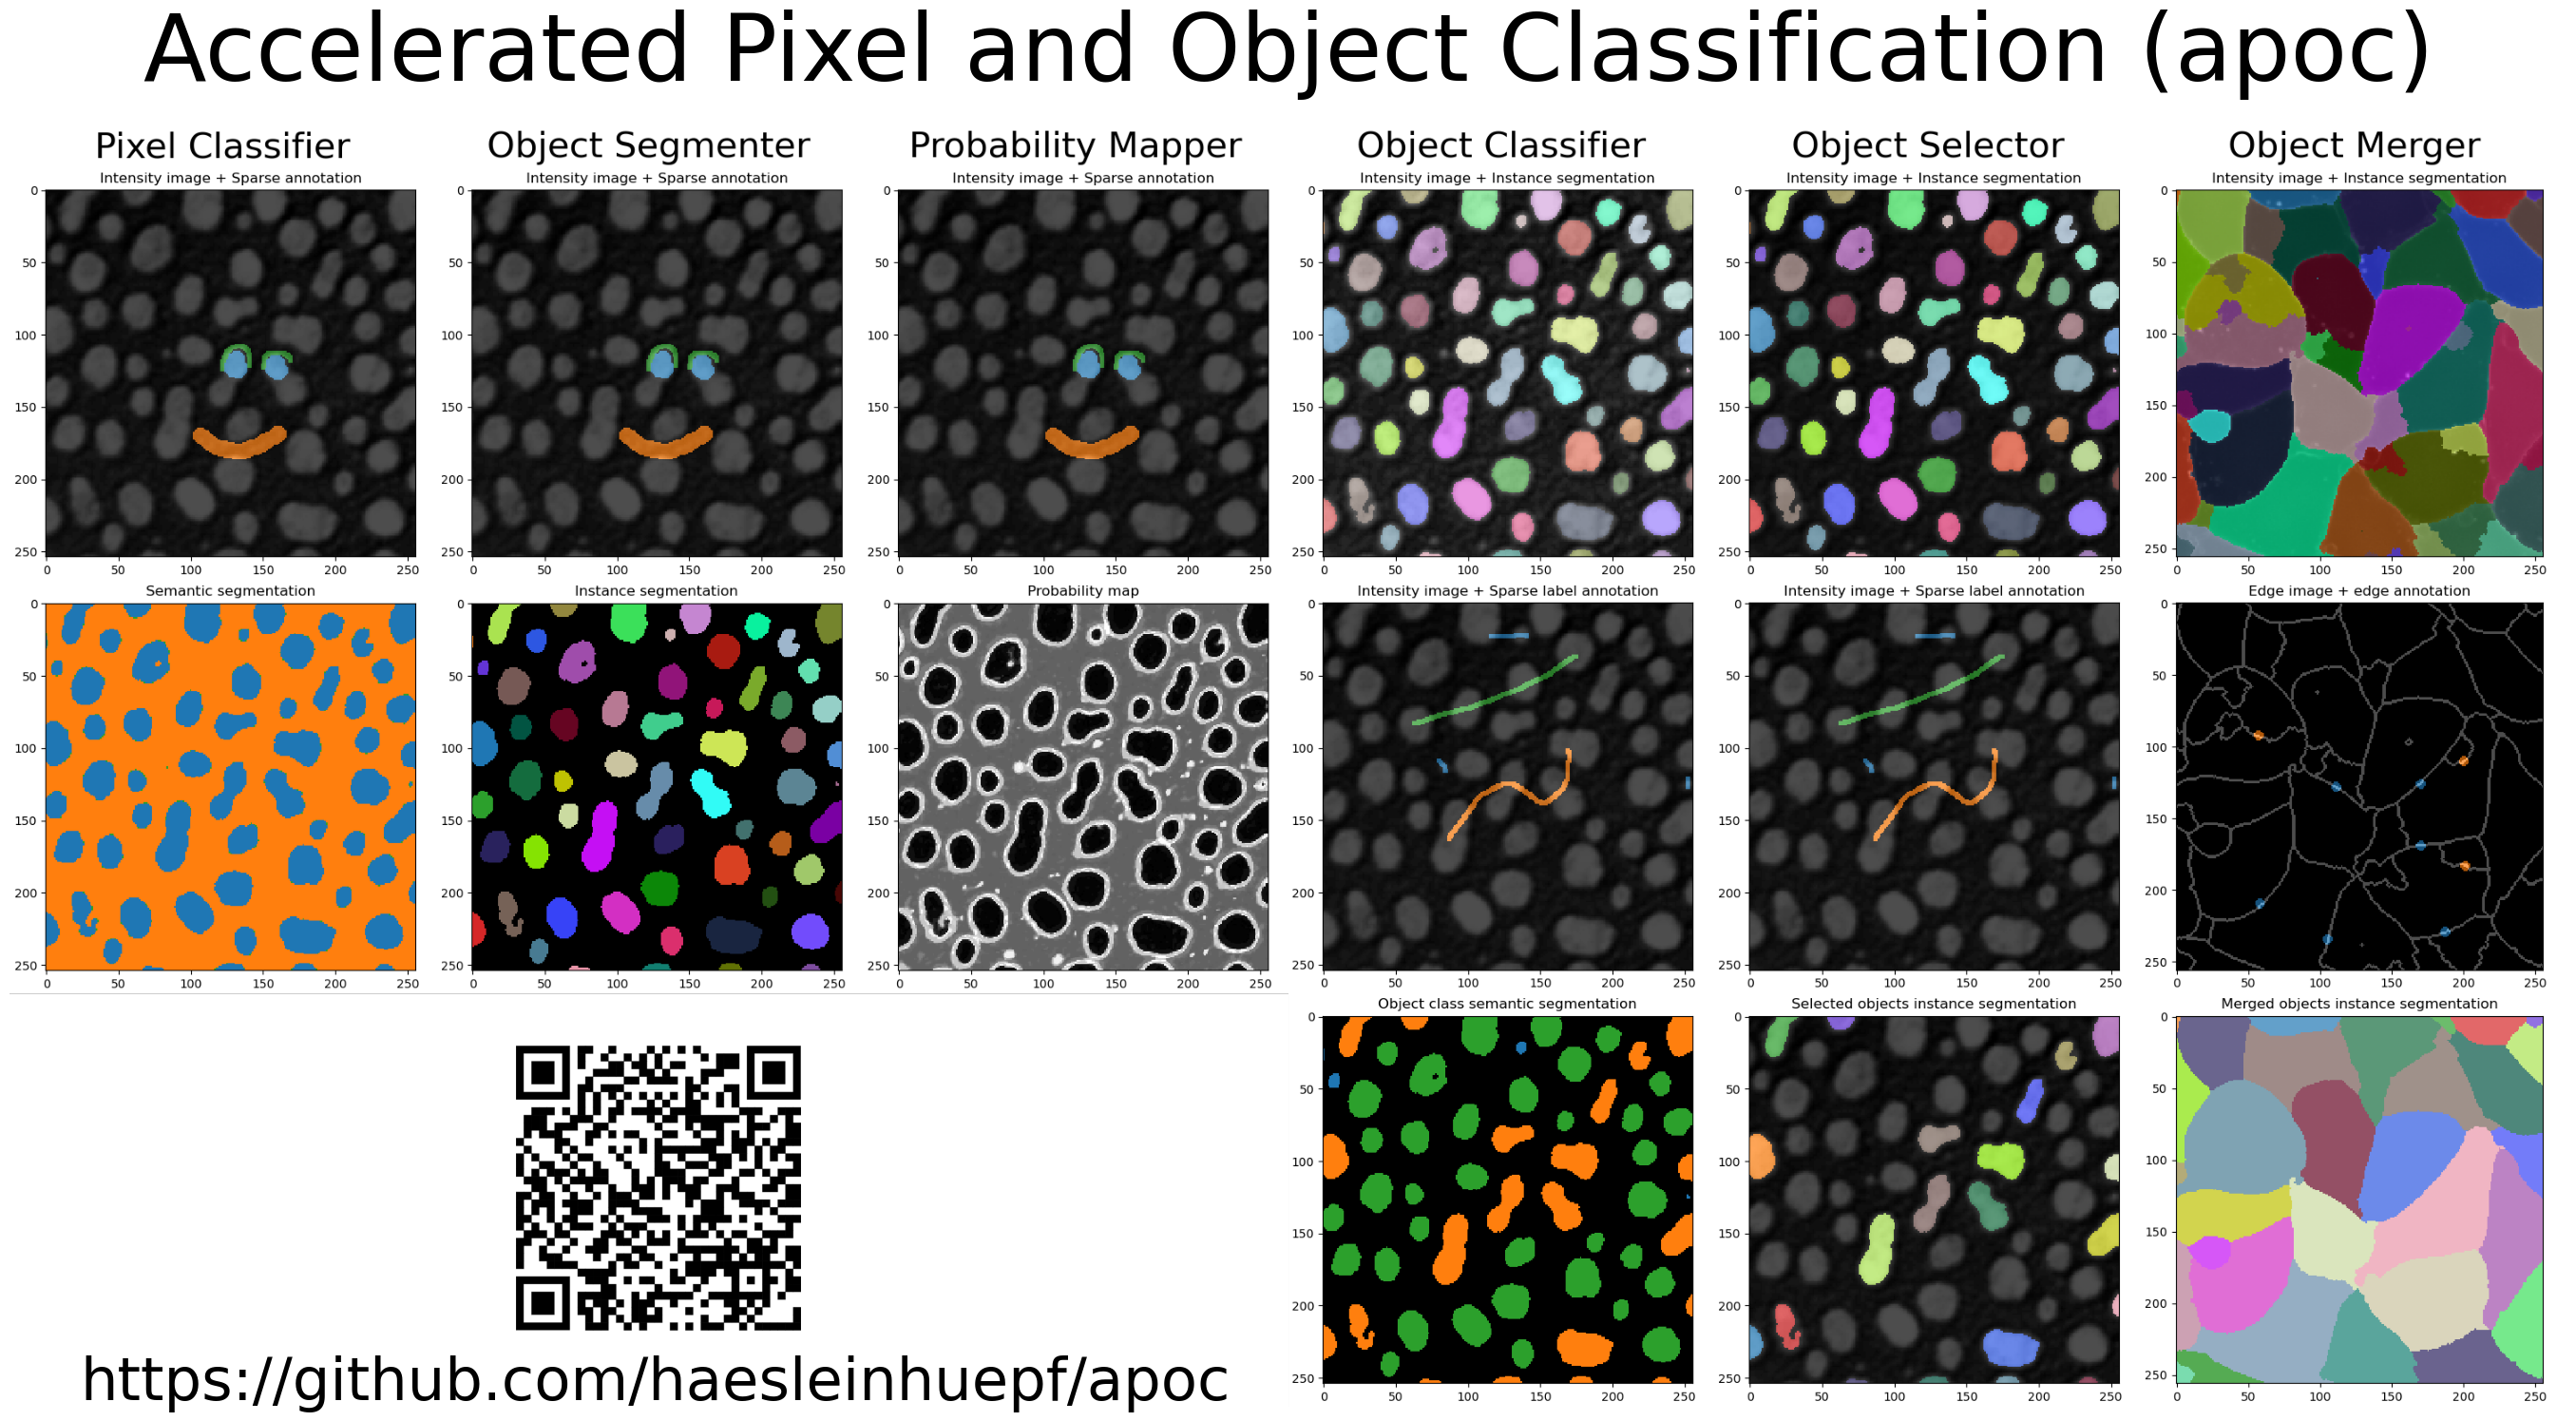

In [21]:
fig = plt.figure(figsize=(27,15), constrained_layout=True)
plt.imshow(combined)
plt.axis('off')
plt.suptitle('Accelerated Pixel and Object Classification (apoc)',fontsize=70)

#plt.rcParams["figure.figsize"] = [7.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
im = plt.imread('../docs/qr_code.png')
newax = fig.add_axes([0.11,0.07,0.2,0.2], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')

plt.text(-1000, 810, "https://github.com/haesleinhuepf/apoc", fontsize=45)

plt.savefig("../docs/graphical_abstract.png", pad_inches=0)